## Fresh Attempt, will try do this time 
# Linear Regression from Scratch:

## Mathematical Theory:

- Linear regression is a type of supervised learning.
- This means that the data includes both the input features and the "correct" answers for those features.
- The resulting model can be used to predict output $\hat{y}$ for new input features $x_i$
- The line can be represented as $y = wx + b$
    - where,
    - $w$ = slope of the line
    - $b$ = intercept
    - $y$ = output
    - $x$ = input
- The goal of linear regression is to find a straight line that fits the data 
- The values of $w$ and $b$ will determine the value of output $\hat{y}_i$ for input $x_i$

## Cost Function:
- In order to find the ideal values for $w$ and $b$, we have to find their values such that the **error** is minimum.
- We do this by finding the error, $Error = \hat{y}_i - y_i$
- This is the difference between predicted value $\hat{y}_i$ and actual value $y_i$.
- Next, we square this error to ensure that all the differences are positive and to penalize larger errors.
- Then, we take the error function of all values of $x$, by multiplying error with $\sum^{m}_{i=1}$
- Then we take the average $\frac{1}{2m}$
Therefore, the cost function is:
$$
C(w, b) = \frac{1}{2m} \sum^{m}_{i=1} * (f(x_i) - y_i)^2
$$
$$
 = \frac{1}{2m} \sum^{m}_{i=1} * ((wx_i + b) - y)^2
$$

This is called the **Mean Squared Error**
In order to minmize this cost function, we use an algorithm called gradient descent.

## Gradient Descent Algorithm:

We start with some initial values $w = 0$ and $b = 0$  
Then, we repeatedly update w and b in small steps to reduce the cost  
Until we reach the lowest possible cost.

The gradient always points in the **steepest** direction.
So we take the opposite direction.

In mathematical form:
$$
w = w - \alpha \frac{\partial{C}(w, b)}{\partial{w}}
$$
$$
b = b - \alpha \frac{\partial{C}(w, b)}{\partial{b}}
$$

where, $\alpha$ is the **learning rate**
the learning rate is the *number of steps* that the descent takes to reach the lowest possible cost.
It must be a **small** value so as to avoid overstepping the lowest point.

$$
\frac{\partial{C}(w, b)}{\partial{w}} = \frac{\partial}{\partial{w}} \biggl( \frac{1}{2m} \sum^{m}_{i=1} ((wx_i + b) - y_i)^2 \biggl)
$$

$$
 = \frac{1}{m} \sum^{m}_{i=1} x_i ((wx_i + b) - y_i)
$$

Similarly, for partial differentation with respect to b,
$$
\frac{\partial}{\partial{b}} = \frac{1}{m} \sum^{m}_{i=1} ((wx_i + b) - y_i)
$$

Now, let us implement it in code:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
training_set = pd.read_csv("Salary_Data.csv")

In [12]:
training_set.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [14]:
len(training_set)

30

In [15]:
x_train = training_set["YearsExperience"].values
y_train = training_set["Salary"].values

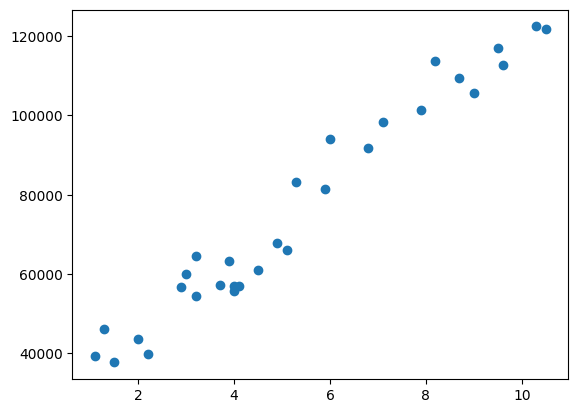

In [17]:
plt.scatter(x_train, y_train)

Our goal is to implement a straight line on this plot such that it fits perfectly with the plotted data.

In [18]:
def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0

    for i in range(m):
        f = w * x[i] + b
        cost_sum += (f - y[i]) **2
    total_cost = (1/(2*m)) * cost_sum
    return total_cost

In [21]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b
        dc_dw += x[i] * (f - y[i])
        dc_db += f - y[i]
    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db

In [22]:
def gradient_descent(x, y, alpha, iterations):
    w = 0
    b = 0

    for i in range(iterations):
        dc_dw, dc_db = gradient_function(x, y, w, b)
        w -= alpha * dc_dw
        b -= alpha * dc_db

        print(f"iteration {i}: Cost {cost_function(x, y, w, b)}")
    
    return w, b

In [26]:
learning_rate = 0.01
iterations = 1000

w, b = gradient_descent(x_train, y_train, learning_rate, iterations)
print(w, b)

iteration 0: Cost 1344612525.8413548
iteration 1: Cost 582933639.1249903
iteration 2: Cost 278595825.9816312
iteration 3: Cost 156901936.81054005
iteration 4: Cost 108149191.53202362
iteration 5: Cost 88526795.5063979
iteration 6: Cost 80538511.12387824
iteration 7: Cost 77197055.8093798
iteration 8: Cost 75711992.7100282
iteration 9: Cost 74968933.0700283
iteration 10: Cost 74522833.02695376
iteration 11: Cost 74195957.63300419
iteration 12: Cost 73917324.17093241
iteration 13: Cost 73658582.39816462
iteration 14: Cost 73408407.74554898
iteration 15: Cost 73162275.01092048
iteration 16: Cost 72918374.39160368
iteration 17: Cost 72675980.51521407
iteration 18: Cost 72434801.09739313
iteration 19: Cost 72194716.82236984
iteration 20: Cost 71955677.46187694
iteration 21: Cost 71717660.38925987
iteration 22: Cost 71480654.01166648
iteration 23: Cost 71244651.15349762
iteration 24: Cost 71009646.41398282
iteration 25: Cost 70775635.11185879
iteration 26: Cost 70542612.86387192
iteration 27

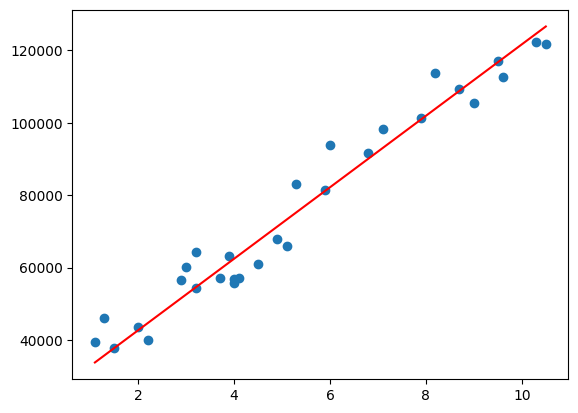

In [29]:
plt.scatter(x_train, y_train, label='Data Points')

x_vals = np.linspace(min(x_train), max(x_train), 100)
y_vals = w * x_vals + b
plt.plot(x_vals, y_vals, color='red', label='regression line')

With this, we have achieved the task of implementing linear regression from scratch.